In [1]:
# initial set-up
import pandas as pd
import numpy_financial as npf
import matplotlib.pyplot as plt
from collections import namedtuple

In [2]:
# loan characteristics
original_balance = 5_000
coupon = 0.30
term = 3 * 12

# payments
periods = range(1, term + 1)
interest_payment = npf.ipmt(rate=coupon/12, per=periods, nper=term, pv=-original_balance)
principal_payment = npf.ppmt(rate=coupon/12, per=periods, nper=term, pv=-original_balance)

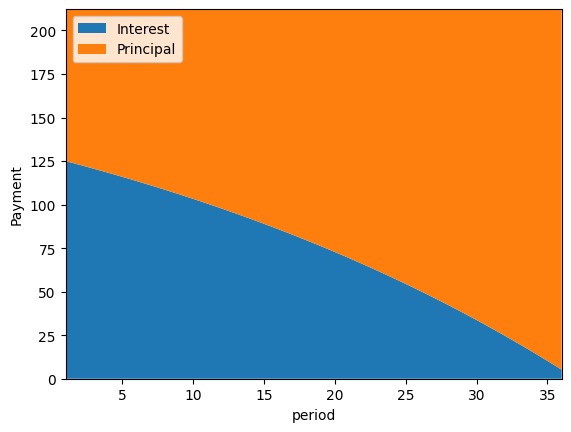

In [3]:
plt.stackplot(periods, interest_payment, principal_payment, labels=['Interest', 'Principal'])
plt.legend(loc='upper left')
plt.xlabel("period")
plt.ylabel("Payment")
plt.margins(0,0)

In [4]:
# This is our total interest paid over the term of the loan.
sum(interest_payment)

2641.283813826866

In [5]:
# pandas float formatting.
pd.options.display.float_format = '{:,.2f}'.format

# cash flow table
cf_data = {'Interest': interest_payment, 'Principal': principal_payment}
cf_table = pd.DataFrame(data=cf_data, index=periods)
cf_table['Payment'] = cf_table['Interest'] + cf_table['Principal']
cf_table['Ending Balance'] = original_balance - cf_table['Principal'].cumsum()
cf_table['Beginning Balance'] = [original_balance] + list(cf_table['Ending Balance'])[:-1]
cf_table = cf_table[['Beginning Balance', 'Payment', 'Interest', 'Principal', 'Ending Balance']]
cf_table

,Beginning Balance,Payment,Interest,Principal,Ending Balance
1,"5,000.00",212.26,125.00,87.26,"4,912.74"
2,"4,912.74",212.26,122.82,89.44,"4,823.30"
3,"4,823.30",212.26,120.58,91.68,"4,731.63"
4,"4,731.63",212.26,118.29,93.97,"4,637.66"
5,"4,637.66",212.26,115.94,96.32,"4,541.34"
6,"4,541.34",212.26,113.53,98.72,"4,442.62"
7,"4,442.62",212.26,111.07,101.19,"4,341.43"
8,"4,341.43",212.26,108.54,103.72,"4,237.71"
9,"4,237.71",212.26,105.94,106.32,"4,131.39"
10,"4,131.39",212.26,103.28,108.97,"4,022.42"
